In [ ]:
# Install the software we need
import sys
!{sys.executable} -m pip install lalsuite=='6.48.1.dev20180620' pycbc

In [2]:
# Get the data for H1 from the LOSC site
!curl -O -J https://losc.ligo.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
!curl -O -J https://losc.ligo.org/s/events/GW170104/L-L1_LOSC_4_V1-1167559920-32.gwf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1000k  100 1000k    0     0  1772k      0 --:--:-- --:--:-- --:--:-- 1773k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  970k  100  970k    0     0  1659k      0 --:--:-- --:--:-- --:--:-- 1658k


### See the track of GW170104 in both the Hanford and Livingston data ###

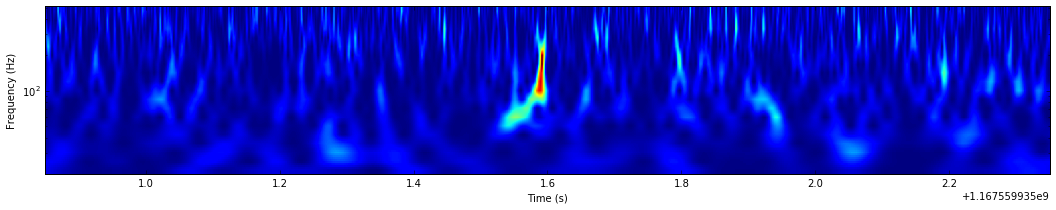

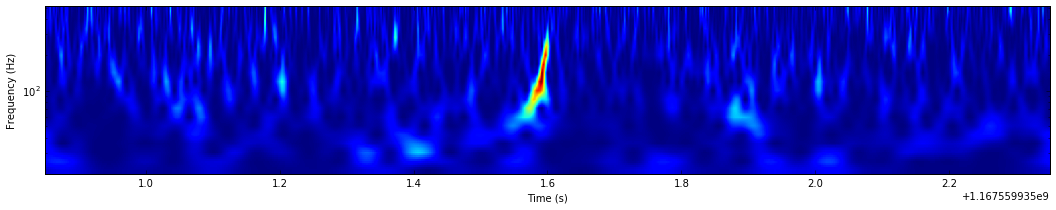

In [3]:
%matplotlib inline
from pycbc.frame import read_frame
import pylab

for ifo in ['H', 'L']:
    pylab.figure()
    ts = read_frame('%s-%s1_LOSC_4_V1-1167559920-32.gwf' % (ifo, ifo), '%s1:LOSC-STRAIN' % ifo, duration=32)

    ts = ts.whiten(4, 4)
    zoom = ts.time_slice(1167559936.6 - .75, 1167559936.6 + .75)
    times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

    pylab.figure(figsize=(18, 3))
    pylab.pcolormesh(times, freqs, power)
    
    pylab.ylim(20, 512)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(times.min(), times.max())
    pylab.yscale('log')